In [1]:
import json, cv2, os
from collections import Counter
import numpy as np
from tqdm.notebook import tqdm

from matplotlib import pyplot as plt

In [27]:
# dataset_json = '/home/hkhachatrian/mae/annotations/few_shot_visdrone_vis_drone_train_inter_internearestexact_patch_16.npy'

# dataset_json = '/home/hkhachatrian/mae/annotations/few_shot_visdrone_val_vis_drone_val_inter_internearestexact_patch_16.npy'

dataset_json = '/home/hkhachatrian/mae/annotations/cs/cs_train_2.npy'
# dataset_json = '/home/hkhachatrian/mae/annotations/cs_val.npy'

In [28]:
# target_path = '/mnt/lwll/lwll-coral/hrant/vis_drone_200/train/'
# target_path = '/mnt/lwll/lwll-coral/hrant/vis_drone_200/val/'

# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_200/train/'
# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_200/val/'

# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_400/train/'
# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_400/val/'

target_path = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_2/train/'
# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_256/val/'

# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_512/train/'
# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_512/val/'

# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_128/train/'
# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_128/val/'
os.makedirs(target_path, exist_ok=True)

In [29]:
%%time
dataset = np.load(dataset_json, allow_pickle=True).item()

CPU times: user 29.2 ms, sys: 122 ms, total: 151 ms
Wall time: 563 ms


In [30]:
target_size = 256

In [20]:
dataset.keys()

dict_keys(['images', 'annotations', 'categories'])

In [21]:
dataset['images'][0].keys()

dict_keys(['file_name', 'height', 'width', 'id', 'black_image', 'patch_labels'])

In [22]:
dataset['images'][0]['file_name']

'/mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/train/krefeld/krefeld_000000_011655_leftImg8bit.png'

In [23]:
dataset['images'][0]['patch_labels'].dtype

dtype('uint8')

In [31]:
tiled_dataset = {
    'images': [],
    'categories': dataset['categories']
}

for image in tqdm(dataset['images'][:]):
    height, width = image['height'], image['width']
    file_name_split = image['file_name'].split('/')[-1].split('.')
    # print(file_name_split)
    name = '.'.join(file_name_split[:-1])
    extension = file_name_split[-1]
    
    y_count = int(np.ceil(height / target_size))
    x_count = int(np.ceil(width / target_size))
    
    img = cv2.imread(image['file_name'])
    img_pad = np.zeros((y_count * target_size, x_count * target_size, img.shape[2]), np.uint8)
    img_pad[:height, :width] = img
    
    mask_pad = np.zeros((y_count * target_size, x_count * target_size), np.uint8)
    mask_pad[:height, :width] = image['black_image']
    
    for y in range(y_count):
        for x in range(x_count):
            tile = img_pad[y * target_size : (y+1) * target_size, x * target_size : (x+1) * target_size]
            tile_name = os.path.join(target_path, f"{name}.{target_size}_{y}_{x}.{extension}")
            
            cv2.imwrite(tile_name, tile)
            
            tile_black_image = mask_pad[y * target_size : (y+1) * target_size, x * target_size : (x+1) * target_size]
            
            tile_patch_labels = cv2.resize(tile_black_image, (14,14), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
            
            tiled_dataset['images'].append({
                'file_name': tile_name,
                'height': target_size,
                'width': target_size,
                'id': image['id'], # if we need annotations, this has to be fixed
                'black_image': tile_black_image,
                'patch_labels': tile_patch_labels
            })

  0%|          | 0/36 [00:00<?, ?it/s]

In [32]:
len(tiled_dataset['images'])

1152

In [ ]:
# np.save("/home/hkhachatrian/mae/annotations/vis_drone_200_train_patch_16.npy", tiled_dataset)

In [ ]:
# np.save("/home/hkhachatrian/mae/annotations/vis_drone_200_val_patch_16.npy", tiled_dataset)

In [ ]:
# np.save("/home/hkhachatrian/mae/annotations/cs4pc_200_val.npy", tiled_dataset)

In [ ]:
# np.save("/home/hkhachatrian/mae/annotations/cs4pc_200_train.npy", tiled_dataset)

In [ ]:
# np.save("/home/hkhachatrian/mae/annotations/cs4pc_400_train.npy", tiled_dataset)

In [ ]:
# np.save("/home/hkhachatrian/mae/annotations/cs4pc_400_val.npy", tiled_dataset)

In [33]:
np.save("/home/hkhachatrian/mae/annotations/cs/cs4pc_256_train_2.npy", tiled_dataset)
# np.save("/home/hkhachatrian/mae/annotations/cs4pc_256_val.npy", tiled_dataset)

In [33]:
# np.save("/home/hkhachatrian/mae/annotations/cs4pc_512_train.npy", tiled_dataset)
# np.save("/home/hkhachatrian/mae/annotations/cs4pc_512_val.npy", tiled_dataset)

In [46]:
# np.save("/home/hkhachatrian/mae/annotations/cs4pc_128_train.npy", tiled_dataset)
np.save("/home/hkhachatrian/mae/annotations/cs4pc_128_val.npy", tiled_dataset)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
import torch

In [3]:
df = np.load("/home/hkhachatrian/mae/annotations/cs4pc_256_train.npy", allow_pickle=True).item()

In [32]:
len(df['images'])

2304

In [5]:
df.keys()

dict_keys(['images', 'categories'])

In [7]:
df['images'][0].keys()

dict_keys(['file_name', 'height', 'width', 'id', 'black_image', 'patch_labels'])

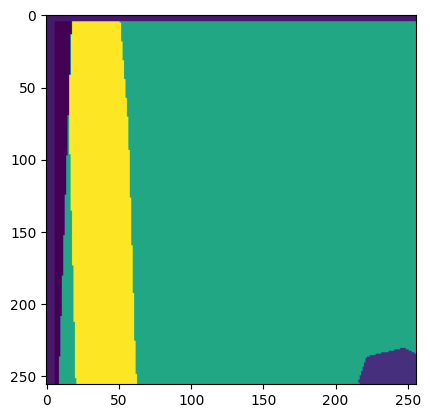

In [11]:
plt.imshow(df['images'][0]['black_image']);

In [14]:
import cv2

In [40]:
tile_patch_labels = cv2.resize(df['images'][0]['black_image'], (56, 56), interpolation=cv2.INTER_NEAREST_EXACT)

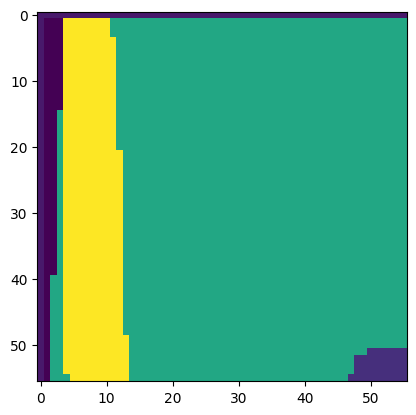

In [16]:
plt.imshow(tile_patch_labels)

In [42]:
tile_patch_labels.

(56, 56)

torch.Size([1, 1, 14, 14])
torch.Size([56, 56])


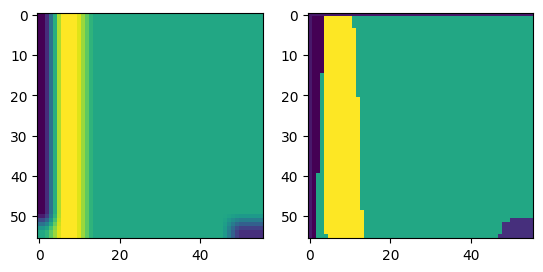

In [41]:
x = nn.Upsample(scale_factor=(4, 4), mode='bilinear', align_corners=False)
img = torch.tensor(df['images'][0]['patch_labels'].reshape(14, 14)).unsqueeze(0).unsqueeze(0).to(float)
print(img.shape)

img = x(img)
img = img.squeeze(0).squeeze(0)
# img = img.permute(0, 2, 3, 1)

print(img.shape)

fig, axes = plt.subplots(ncols=2, nrows=1)
axes[0].imshow(img);
axes[1].imshow(tile_patch_labels);

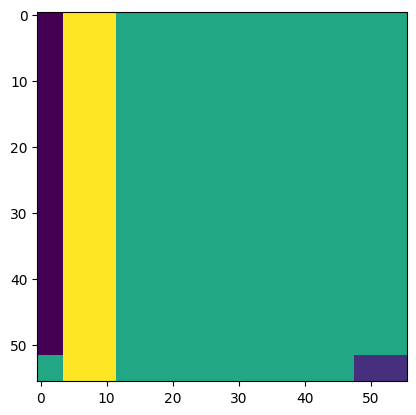

In [19]:
tile_patch_labels = cv2.resize(df['images'][0]['patch_labels'].reshape(14, 14), (56, 56), interpolation=cv2.INTER_NEAREST_EXACT)
plt.imshow(tile_patch_labels)

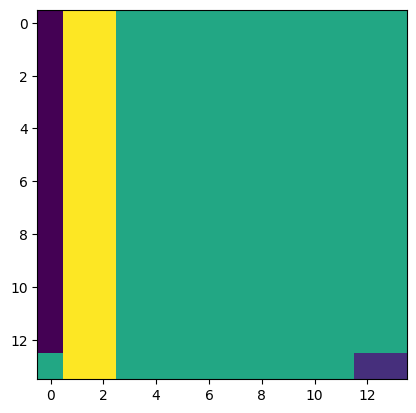

In [12]:
plt.imshow(df['images'][0]['patch_labels'].reshape(14, 14));